## Get Annotations

In [1]:
import json
import pandas as pd

folder_path = '/workspace/datasets/coco_minitrain_25k/annotations/'
file_name = 'instances_minitrain2017.json'

file_path = folder_path + file_name
    
with open(file_path, 'r') as file:
    data = json.load(file)


df_annots = pd.DataFrame(data['annotations'])
df_annots = df_annots[['image_id', 'bbox', 'category_id']]
df_annots

,image_id,bbox,category_id
0,231538,"[314.97, 192.72, 102.11, 366.74]",1
1,231538,"[213.33, 202.02, 117.41, 307.83]",1
2,231538,"[177.8, 225.12, 25.63, 83.93]",1
3,231538,"[227.43, 499.95, 120.41, 80.28]",33
4,231538,"[199.9, 221.44, 27.03, 85.28]",1
...,...,...,...
183541,405192,"[386.52, 0.36, 40.48, 65.99]",1
183542,405192,"[21.92, 0.0, 354.91, 180.81]",1
183543,381107,"[224.93, 171.77, 415.07, 125.92]",5
183544,381107,"[66.03, 232.73, 35.59, 11.87]",5


In [2]:
df_images = pd.DataFrame(data['images'])
df_images = df_images[['file_name', 'id']]
df_images.rename(columns={'id':'image_id', 'file_name':'filename'}, inplace=True)
df_images

,filename,image_id
0,000000231538.jpg,231538
1,000000322749.jpg,322749
2,000000318299.jpg,318299
3,000000025290.jpg,25290
4,000000020276.jpg,20276
...,...,...
24995,000000465301.jpg,465301
24996,000000281503.jpg,281503
24997,000000260893.jpg,260893
24998,000000405192.jpg,405192


In [3]:
merged_df = pd.merge(df_annots, df_images, on='image_id', how='left')
merged_df.rename(columns={'bbox':'gt_bbox', 'category_id':'gt_category_id'}, inplace=True)
merged_df = merged_df[['filename', 'gt_bbox', 'gt_category_id']]
merged_df

,filename,gt_bbox,gt_category_id
0,000000231538.jpg,"[314.97, 192.72, 102.11, 366.74]",1
1,000000231538.jpg,"[213.33, 202.02, 117.41, 307.83]",1
2,000000231538.jpg,"[177.8, 225.12, 25.63, 83.93]",1
3,000000231538.jpg,"[227.43, 499.95, 120.41, 80.28]",33
4,000000231538.jpg,"[199.9, 221.44, 27.03, 85.28]",1
...,...,...,...
183541,000000405192.jpg,"[386.52, 0.36, 40.48, 65.99]",1
183542,000000405192.jpg,"[21.92, 0.0, 354.91, 180.81]",1
183543,000000381107.jpg,"[224.93, 171.77, 415.07, 125.92]",5
183544,000000381107.jpg,"[66.03, 232.73, 35.59, 11.87]",5


In the annotations, the index class starts from 1. In yolo it starts from 0. Let standardize them.

In [4]:
merged_df['gt_category_id'] = merged_df['gt_category_id'] - 1
merged_df

,filename,gt_bbox,gt_category_id
0,000000231538.jpg,"[314.97, 192.72, 102.11, 366.74]",0
1,000000231538.jpg,"[213.33, 202.02, 117.41, 307.83]",0
2,000000231538.jpg,"[177.8, 225.12, 25.63, 83.93]",0
3,000000231538.jpg,"[227.43, 499.95, 120.41, 80.28]",32
4,000000231538.jpg,"[199.9, 221.44, 27.03, 85.28]",0
...,...,...,...
183541,000000405192.jpg,"[386.52, 0.36, 40.48, 65.99]",0
183542,000000405192.jpg,"[21.92, 0.0, 354.91, 180.81]",0
183543,000000381107.jpg,"[224.93, 171.77, 415.07, 125.92]",4
183544,000000381107.jpg,"[66.03, 232.73, 35.59, 11.87]",4


In [8]:
gt_df = merged_df.groupby('filename').agg({'gt_bbox': list, 'gt_category_id': list}).reset_index()
gt_df

,filename,gt_bbox,gt_category_id
0,000000000025.jpg,"[[385.53, 60.03, 214.97, 297.16], [53.01, 356....","[24, 24]"
1,000000000030.jpg,"[[204.86, 31.02, 254.88, 324.12], [237.56, 155...","[63, 85]"
2,000000000036.jpg,"[[0.0, 50.12, 457.68, 430.35], [167.58, 162.89...","[27, 0]"
3,000000000061.jpg,"[[261.2, 205.92, 48.08, 57.24], [393.39, 210.3...","[0, 0, 21, 21, 0]"
4,000000000109.jpg,"[[539.72, 295.45, 22.91, 18.39], [512.89, 271....","[17, 0, 0, 0, 14, 14, 0, 0]"
...,...,...,...
24995,000000581863.jpg,"[[1.66, 589.63, 113.04, 41.56]]",[69]
24996,000000581881.jpg,"[[309.79, 229.12, 41.88, 67.3], [330.37, 217.2...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1..."
24997,000000581900.jpg,"[[81.01, 193.51, 26.01, 43.08], [35.18, 195.71...","[61, 61, 3, 0, 0, 0, 30, 0, 84, 0, 0, 32]"
24998,000000581903.jpg,"[[359.77, 298.7, 59.73, 161.69]]",[43]


## Merge with predictions df

In [7]:
pred_df = pd.read_parquet('yolov8n_detection_results.parquet')
pred_df.rename(columns={'det_boxes':'pred_bbox', 'det_conf':'pred_conf', 'det_category_id':'pred_category_id'}, inplace=True)
pred_df

,filename,id,pred_bbox,pred_conf,pred_category_id
0,000000231538.jpg,231538,"[[369.12, 374.82, 94.64, 367.55], [275.72, 360...","[0.8767, 0.8523, 0.7863, 0.7315, 0.6548, 0.618...","[0, 0, 0, 28, 0, 24, 28, 0, 28]"
1,000000322749.jpg,322749,"[[194.15, 80.24, 183.24, 151.9], [582.14, 249....","[0.7612, 0.7044, 0.5148, 0.4506, 0.4182, 0.326...","[50, 50, 51, 50, 50, 51, 51]"
2,000000318299.jpg,318299,"[[458.6, 221.3, 362.52, 239.65], [178.15, 203....","[0.9268, 0.8947, 0.2532]","[7, 7, 7]"
3,000000025290.jpg,25290,"[[460.87, 165.48, 334.83, 326.56], [540.66, 33...","[0.9171, 0.8854]","[0, 36]"
4,000000020276.jpg,20276,"[[292.33, 211.56, 211.44, 191.84], [177.89, 30...","[0.8757, 0.8557]","[0, 37]"
...,...,...,...,...,...
24995,000000465301.jpg,465301,"[[283.26, 280.91, 88.91, 123.57], [69.65, 300....","[0.8988, 0.8958, 0.7998, 0.5443, 0.5305, 0.394...","[56, 57, 56, 56, 69, 56, 60, 72, 68, 56]"
24996,000000281503.jpg,281503,"[[345.71, 114.32, 68.75, 142.11], [240.0, 237....","[0.9087, 0.8906, 0.88, 0.8417, 0.7915, 0.6311,...","[0, 0, 32, 0, 0, 0, 34, 0, 34, 0]"
24997,000000260893.jpg,260893,"[[157.85, 202.96, 161.85, 312.32], [182.92, 19...","[0.9464, 0.464]","[76, 76]"
24998,000000405192.jpg,405192,"[[179.49, 475.72, 355.93, 328.03], [387.29, 44...","[0.9233, 0.8982, 0.8885, 0.8275, 0.7691, 0.658...","[53, 42, 0, 60, 0, 40, 53, 56, 41]"


YOLO outputs bbox in cxcywh format. We need to convert it into xywh format to match the bbox in gt

In [18]:
def convert_bbox(bbox):
    cx, cy, w, h = bbox
    x = cx - w / 2
    y = cy - h / 2
    return [x, y, w, h]

def convert_dataframe(df):
    # Convert bounding box coordinates for each row
    df['pred_bbox'] = df['pred_bbox'].apply(lambda x: [convert_bbox(bbox) for bbox in x])
    return df

converted_df = convert_dataframe(pred_df)

In [19]:
converted_df

,filename,id,pred_bbox,pred_conf,pred_category_id
0,000000231538.jpg,231538,"[[321.8, 191.045, 94.64, 367.55], [217.0300000...","[0.8767, 0.8523, 0.7863, 0.7315, 0.6548, 0.618...","[0, 0, 0, 28, 0, 24, 28, 0, 28]"
1,000000322749.jpg,322749,"[[102.53, 4.289999999999992, 183.24, 151.9], [...","[0.7612, 0.7044, 0.5148, 0.4506, 0.4182, 0.326...","[50, 50, 51, 50, 50, 51, 51]"
2,000000318299.jpg,318299,"[[277.34000000000003, 101.47500000000001, 362....","[0.9268, 0.8947, 0.2532]","[7, 7, 7]"
3,000000025290.jpg,25290,"[[293.45500000000004, 2.1999999999999886, 334....","[0.9171, 0.8854]","[0, 36]"
4,000000020276.jpg,20276,"[[186.60999999999999, 115.64, 211.44, 191.84],...","[0.8757, 0.8557]","[0, 37]"
...,...,...,...,...,...
24995,000000465301.jpg,465301,"[[238.805, 219.12500000000003, 88.91, 123.57],...","[0.8988, 0.8958, 0.7998, 0.5443, 0.5305, 0.394...","[56, 57, 56, 56, 69, 56, 60, 72, 68, 56]"
24996,000000281503.jpg,281503,"[[311.335, 43.264999999999986, 68.75, 142.11],...","[0.9087, 0.8906, 0.88, 0.8417, 0.7915, 0.6311,...","[0, 0, 32, 0, 0, 0, 34, 0, 34, 0]"
24997,000000260893.jpg,260893,"[[76.925, 46.80000000000001, 161.85, 312.32], ...","[0.9464, 0.464]","[76, 76]"
24998,000000405192.jpg,405192,"[[1.5250000000000057, 311.70500000000004, 355....","[0.9233, 0.8982, 0.8885, 0.8275, 0.7691, 0.658...","[53, 42, 0, 60, 0, 40, 53, 56, 41]"


In [20]:
merged_df = pd.merge(gt_df, converted_df, on='filename')
merged_df = merged_df[['filename', 'gt_bbox', 'gt_category_id', 'pred_bbox', 'pred_conf', 'pred_category_id']]
merged_df

,filename,gt_bbox,gt_category_id,pred_bbox,pred_conf,pred_category_id
0,000000000025.jpg,"[[385.53, 60.03, 214.97, 297.16], [53.01, 356....","[24, 24]","[[383.285, 63.889999999999986, 216.63, 294.06]...","[0.9051, 0.4291]","[23, 23]"
1,000000000030.jpg,"[[204.86, 31.02, 254.88, 324.12], [237.56, 155...","[63, 85]","[[239.97500000000002, 155.625, 167.49, 195.83]...","[0.9049, 0.2566]","[75, 58]"
2,000000000036.jpg,"[[0.0, 50.12, 457.68, 430.35], [167.58, 162.89...","[27, 0]","[[174.31000000000003, 157.92, 285.84, 481.92],...","[0.9115, 0.7233]","[0, 25]"
3,000000000061.jpg,"[[261.2, 205.92, 48.08, 57.24], [393.39, 210.3...","[0, 0, 21, 21, 0]","[[222.41499999999996, 239.29999999999998, 145....","[0.5402, 0.4533]","[19, 0]"
4,000000000109.jpg,"[[539.72, 295.45, 22.91, 18.39], [512.89, 271....","[17, 0, 0, 0, 14, 14, 0, 0]","[[513.9350000000001, 271.4, 16.51, 38.58], [58...","[0.7398, 0.6102, 0.261, 0.2607]","[0, 0, 8, 0]"
...,...,...,...,...,...,...
24995,000000581863.jpg,"[[1.66, 589.63, 113.04, 41.56]]",[69],"[[0.32499999999999574, 587.335, 111.59, 52.29]]",[0.6729],[61]
24996,000000581881.jpg,"[[309.79, 229.12, 41.88, 67.3], [330.37, 217.2...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[[369.185, 149.315, 59.95, 185.21], [197.45000...","[0.9141, 0.7886, 0.7456, 0.7004, 0.6893, 0.633...","[0, 18, 18, 2, 18, 18, 18, 0, 18]"
24997,000000581900.jpg,"[[81.01, 193.51, 26.01, 43.08], [35.18, 195.71...","[61, 61, 3, 0, 0, 0, 30, 0, 84, 0, 0, 32]","[[316.955, 145.91000000000003, 23.51, 70.84], ...","[0.7873, 0.6988, 0.6745, 0.6387, 0.5019, 0.476...","[0, 0, 0, 56, 3, 0, 74, 0, 0, 56, 74]"
24998,000000581903.jpg,"[[359.77, 298.7, 59.73, 161.69]]",[43],"[[360.755, 295.855, 58.05, 163.77], [296.51, 2...","[0.7886, 0.6118, 0.5375, 0.4623, 0.4502, 0.349...","[39, 39, 39, 41, 39, 2, 39]"


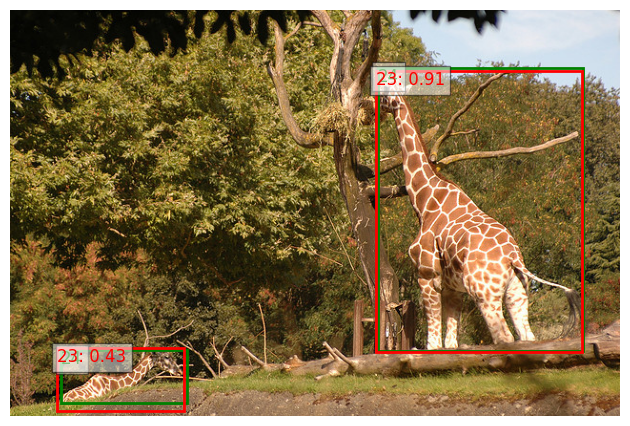

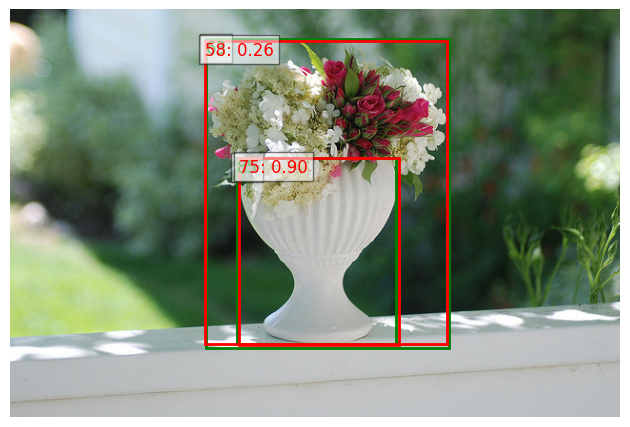

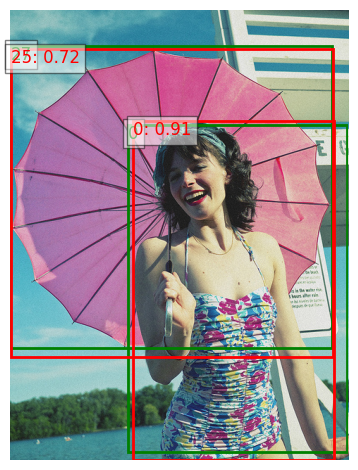

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from PIL import Image

img_folder_path = '/workspace/datasets/coco_minitrain_25k/images/train2017/'

# Assuming your dataframe is named 'df'
for _, row in merged_df.head(3).iterrows():
    filename = row['filename']
    gt_bboxes = row['gt_bbox']
    gt_category_ids = row['gt_category_id']
    pred_bboxes = row['pred_bbox']
    pred_confs = row['pred_conf']
    pred_category_ids = row['pred_category_id']

    # Load the image
    image = Image.open(img_folder_path+filename)

    # Create a figure and axis
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(image)

    # Plot ground truth bounding boxes
    for bbox, category_id in zip(gt_bboxes, gt_category_ids):
        x, y, w, h = bbox
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='g', facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y, str(category_id), color='g', fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

    # Plot predicted bounding boxes
    for bbox, conf, category_id in zip(pred_bboxes, pred_confs, pred_category_ids):
        x, y, w, h = bbox
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y, f'{category_id}: {conf:.2f}', color='r', fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

    # Remove axis
    ax.axis('off')

    # Show the plot
    plt.tight_layout()
    plt.show()

## Score Predictions

In [22]:
def calculate_iou(bbox1, bbox2):
    x1, y1, w1, h1 = bbox1
    x2, y2, w2, h2 = bbox2

    x_left = max(x1, x2)
    y_top = max(y1, y2)
    x_right = min(x1 + w1, x2 + w2)
    y_bottom = min(y1 + h1, y2 + h2)

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    bbox1_area = w1 * h1
    bbox2_area = w2 * h2
    union_area = bbox1_area + bbox2_area - intersection_area

    iou = intersection_area / union_area
    return iou

def find_matching_detections(row):
    gt_bboxes = row['gt_bbox']
    pred_bboxes = row['pred_bbox']

    ious = []
    for gt_bbox in gt_bboxes:
        max_iou = 0
        for pred_bbox in pred_bboxes:
            iou = calculate_iou(gt_bbox, pred_bbox)
            max_iou = max(max_iou, iou)
        ious.append(max_iou)

    return ious

# Assuming your dataframe is named 'df'
merged_df['ious'] = merged_df.apply(find_matching_detections, axis=1)

merged_df

,filename,gt_bbox,gt_category_id,pred_bbox,pred_conf,pred_category_id,ious
0,000000000025.jpg,"[[385.53, 60.03, 214.97, 297.16], [53.01, 356....","[24, 24]","[[383.285, 63.889999999999986, 216.63, 294.06]...","[0.9051, 0.4291]","[23, 23]","[0.9718027668715254, 0.8022201392140155]"
1,000000000030.jpg,"[[204.86, 31.02, 254.88, 324.12], [237.56, 155...","[63, 85]","[[239.97500000000002, 155.625, 167.49, 195.83]...","[0.9049, 0.2566]","[75, 58]","[0.9707398484351831, 0.9623389556895399]"
2,000000000036.jpg,"[[0.0, 50.12, 457.68, 430.35], [167.58, 162.89...","[27, 0]","[[174.31000000000003, 157.92, 285.84, 481.92],...","[0.9115, 0.7233]","[0, 25]","[0.9544772378385479, 0.8907728372429947]"
3,000000000061.jpg,"[[261.2, 205.92, 48.08, 57.24], [393.39, 210.3...","[0, 0, 21, 21, 0]","[[222.41499999999996, 239.29999999999998, 145....","[0.5402, 0.4533]","[19, 0]","[0.730318768580354, 0, 0, 0.8004649584782602, ..."
4,000000000109.jpg,"[[539.72, 295.45, 22.91, 18.39], [512.89, 271....","[17, 0, 0, 0, 14, 14, 0, 0]","[[513.9350000000001, 271.4, 16.51, 38.58], [58...","[0.7398, 0.6102, 0.261, 0.2607]","[0, 0, 8, 0]","[0, 0.6824875749698112, 0.6511451091531204, 0...."
...,...,...,...,...,...,...,...
24995,000000581863.jpg,"[[1.66, 589.63, 113.04, 41.56]]",[69],"[[0.32499999999999574, 587.335, 111.59, 52.29]]",[0.6729],[61],[0.7700155964278818]
24996,000000581881.jpg,"[[309.79, 229.12, 41.88, 67.3], [330.37, 217.2...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[[369.185, 149.315, 59.95, 185.21], [197.45000...","[0.9141, 0.7886, 0.7456, 0.7004, 0.6893, 0.633...","[0, 18, 18, 2, 18, 18, 18, 0, 18]","[0.7373719693051073, 0.21219187483219248, 0.58..."
24997,000000581900.jpg,"[[81.01, 193.51, 26.01, 43.08], [35.18, 195.71...","[61, 61, 3, 0, 0, 0, 30, 0, 84, 0, 0, 32]","[[316.955, 145.91000000000003, 23.51, 70.84], ...","[0.7873, 0.6988, 0.6745, 0.6387, 0.5019, 0.476...","[0, 0, 0, 56, 3, 0, 74, 0, 0, 56, 74]","[0.8586871596911263, 0.21759604044095085, 0.89..."
24998,000000581903.jpg,"[[359.77, 298.7, 59.73, 161.69]]",[43],"[[360.755, 295.855, 58.05, 163.77], [296.51, 2...","[0.7886, 0.6118, 0.5375, 0.4623, 0.4502, 0.349...","[39, 39, 39, 41, 39, 2, 39]",[0.9510124404809568]
